In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.layers import Dropout
from keras import optimizers
import numpy as np
from pandas import read_excel
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [2]:
df = read_excel('Data for LSTM.xlsx')
df.head(10)

,Date,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
0,2018-01-01,1,1,1,1,1,1,1,1,1,0,0
1,2018-01-02,1,1,0,0,1,0,0,1,0,1,0
2,2018-01-03,1,1,0,1,0,1,0,0,0,1,0
3,2018-01-04,1,1,1,0,0,1,0,1,0,1,1
4,2018-01-05,1,1,1,1,1,1,0,1,1,0,1
5,2018-01-06,1,1,0,0,0,1,0,1,0,0,1
6,2018-01-07,1,1,1,1,0,1,1,0,1,0,0
7,2018-01-08,1,1,0,0,0,1,1,1,0,0,0
8,2018-01-09,1,1,0,0,0,0,1,0,0,0,1
9,2018-01-10,1,1,0,0,1,1,1,0,0,0,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000195CEEED710>,
      dtype=object)

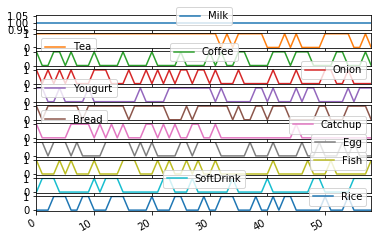

In [3]:
df = df[['Milk','Tea','Coffee','Onion','Yougurt','Bread','Catchup','Egg','Fish','SoftDrink','Rice']]
df.plot(subplots=True)

In [4]:
len(df)

59

In [5]:
tr_te_par = 14
test_index = len(df) - tr_te_par
train=df.iloc[:test_index]
test = df.iloc[test_index:]

In [6]:
#for stateful LSTM, make pertussis the 1st feature in the column order
columns = df[['Milk','Tea','Coffee','Onion','Yougurt','Bread','Catchup','Egg','Fish','SoftDrink','Rice']]

#first convert to a 2d tensor of shape (timesteps, features)
matrix = columns.values

#Normalize the whole matrix 
scaler= MinMaxScaler()
dataset = scaler.fit_transform(matrix)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)
dataset.shape
train.shape
test.shape

(14, 11)

In [43]:
# length=3
# generator = TimeseriesGenerator(train, train, length=3, batch_size=4)

In [7]:
look_back=3
train_data_gen = TimeseriesGenerator(train, train,
    length=look_back, sampling_rate=1,stride=1,
    batch_size=3)
test_data_gen = TimeseriesGenerator(test, test,
    length=look_back, sampling_rate=1,stride=1,
    batch_size=1)

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 11)))
model.add(Dense(11))
model.compile(loss='mean_squared_error', 
              optimizer='adam',
             metrics = ['acc'])
history = model.fit_generator(train_data_gen, epochs=100).history

Epoch 1/100
14/14 [==============================] - 1s 77ms/step - loss: 0.3566 - acc: 0.0476
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3421 - acc: 0.0714
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3288 - acc: 0.0952
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3162 - acc: 0.0952
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3043 - acc: 0.1190
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2923 - acc: 0.1190
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2822 - acc: 0.1190
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2718 - acc: 0.1190
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2619 - acc: 0.1190
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2531 - acc: 0.1190
Epoch 11/100
14/14 [==============================] - 0s 5

14/14 [==============================] - 0s 4ms/step - loss: 0.1603 - acc: 0.7381
Epoch 87/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1599 - acc: 0.7619
Epoch 88/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1596 - acc: 0.7381
Epoch 89/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1596 - acc: 0.7619
Epoch 90/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1590 - acc: 0.7619
Epoch 91/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1589 - acc: 0.7619
Epoch 92/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1585 - acc: 0.7619
Epoch 93/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1583 - acc: 0.7619
Epoch 94/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1581 - acc: 0.7619
Epoch 95/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1577 - acc: 0.7619
Epoch 96/100
14/14 [==============================] - 0s 6ms/st

In [11]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(train_data_gen)
testPredict = model.predict_generator(test_data_gen)

In [12]:
losses=pd.DataFrame(model.history.history)

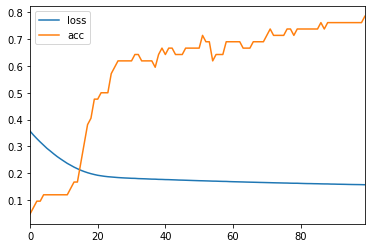

In [13]:
losses.plot()

In [50]:
n_input = 3
n_feature = 11
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_feature))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [62]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                                                  index = df[-n_input:].index,
                                                    columns = ['Milk','Tea','Coffee','Onion','Yougurt','Bread','Catchup','Egg','Fish','SoftDrink','Rice'])
df_test = pd.concat([df, df_predict], axis=1)
df_test.tail()

,Milk,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,...,Tea,Coffee,Onion,Yougurt,Bread,Catchup,Egg,Fish,SoftDrink,Rice
54,1,1,0,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,1,0,0,0,0,1,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,1,0,0,0,1,1,0,0,0,1,...,0.558482,0.137502,0.114692,0.078740,0.344233,0.418923,-0.041374,0.469326,0.032609,0.225761
57,1,1,1,0,1,1,0,0,0,1,...,0.525783,0.112457,0.096933,0.081244,0.320084,0.402067,-0.011428,0.427160,0.014144,0.197405
58,1,0,0,0,1,0,0,0,1,1,...,0.514066,0.060814,0.117654,0.193483,0.328637,0.343364,0.058153,0.245202,0.004869,0.243346


In [33]:
print(batch, '\n')
print(train[-n_input:], '\n')
print(model.predict(batch)[0], '\n')
print(batch[:, 1:, :], '\n')
print([pred_list[i]], '\n')
print(i, '\n')
print(train, '\n')

[[[ 0.00165796  0.55848229  0.13750178  0.11469168  0.07874037
    0.34423304  0.41892254 -0.04137444  0.46932599  0.03260916
    0.2257605 ]
  [ 0.01390614  0.52578294  0.1124566   0.09693297  0.08124371
    0.32008371  0.40206695 -0.01142769  0.42715985  0.01414444
    0.19740497]
  [-0.01974024  0.51406646  0.06081438  0.117654    0.19348252
    0.32863739  0.34336406  0.05815258  0.24520238  0.00486883
    0.24334642]]] 

[[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 

[-0.04295048  0.67105633  0.02635685  0.17365101  0.30004525  0.46735632
  0.3498488   0.21703005  0.07588196  0.05805375  0.34822094] 

[[[ 0.01390614  0.52578294  0.1124566   0.09693297  0.08124371
    0.32008371  0.40206695 -0.01142769  0.42715985  0.01414444
    0.19740497]
  [-0.01974024  0.51406646  0.06081438  0.117654    0.19348252
    0.32863739  0.34336406  0.05815258  0.24520238  0.00486883
    0.24334642]]] 

[array([-0.01974024,  0.51406646, 

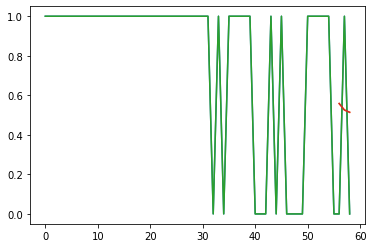

In [82]:
# plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Tea'])
plt.plot(df_test.index, df_test['Tea'])
plt.show()

In [3]:
# dataset = df.values
# dataset = dataset.astype('float32')
# # dataset

In [84]:
# df.dtypes

In [85]:
# df = df[['Milk','Tea','Coffee','Onion','Yougurt','Bread','Catchup','Egg','Fish','SoftDrink','Rice']]
# df.plot(subplots=True)

In [86]:
# #scale the min_max feature
# scaler= MinMaxScaler(feature_range=(0,1))
# dataset = scaler.fit_transform(dataset)
# # dataset

In [87]:
# plt.figure()
# plt.plot(dataset)
# plt.title('After scaling dataset')
# plt.show()

In [91]:
# #train and test split
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train
# train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]

# trainX = train[:,0:10].astype(float)
# trainY = train[:,10]

# testX = test[:,0:10].astype(float)
# testY = test[:,10]

# print('shape of trainX', trainX.shape)
# print('shape of trainY', train.shape)
# print('shape of testX', testX.shape)
# print('shape of testY', testY.shape)

In [89]:
# trainX, trainY = train_test_split(train, train_size=0.7, test_size=0.3, shuffle=False)
# testX, testY = train_test_split(test, train_size=0.7, test_size=0.3, shuffle=False)
# print(trainX.shape)
# print(trainY.shape)
# print(testX.shape)
# print(testY.shape)

In [88]:
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(train, (train.shape[0], 1, train.shape[1]))
# testX = np.reshape(test, (test.shape[0], 1, test.shape[1]))
# print(trainX.shape)
# print(testX.shape)

In [89]:
# #creating model
# def build_model():
#     model = Sequential()
#     model.add(LSTM(4, input_shape=(1, 11)))
#     model.add(Dense(1))
#     model.compile(optimizer = 'Adam',
#                 loss='mean_squared_error',
#                  metrics=['acc'])
#     return model

In [90]:
# df.columns